# Dogs vs Cats classification

In [ ]:
!pip install tensorflow[and-cuda]

### In the github is a reduced size data set because it takes very long time to train in the colaboratory.

Get the dataset

In [ ]:
!wget https://github.com/erinijapranckeviciene/MF54609_18981_1_20241/raw/refs/heads/main/datasets/cats_vs_dogs_very_small.zip

In [ ]:
!pwd
!ls

### Unzip tha dataset here.

In [ ]:
!unzip cats_vs_dogs_very_small.zip

## Data preparation

### Cifar10 dataset is in tensorflow if needed;

After working with the code for classification Dogs vs Cats let's try to adapt ir to other datasets.
In tensorflow datasets https://www.tensorflow.org/datasets/catalog/overview, see the docs how to retrieve it.


In [18]:
#### Made as markdown not to run
import os, shutil, pathlib

original_dir = pathlib.Path("kaggle/train")
new_base_dir = pathlib.Path("cats_vs_dogs_very_small")

"""
This is to prepare data from images from unpacked *zip
Uncomment if running for the first time
def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname, dst=dir / fname)

make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2500)
"""

'\nThis is to prepare data from images from unpacked *zip\nUncomment if running for the first time\ndef make_subset(subset_name, start_index, end_index):\n    for category in ("cat", "dog"):\n        dir = new_base_dir / subset_name / category\n        os.makedirs(dir)\n        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]\n        for fname in fnames:\n            shutil.copyfile(src=original_dir / fname, dst=dir / fname)\n\nmake_subset("train", start_index=0, end_index=1000)\nmake_subset("validation", start_index=1000, end_index=1500)\nmake_subset("test", start_index=1500, end_index=2500)\n'

## Listing 8.7
Instantiating a small convnet for dogs vs. cats classification

In [19]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_1 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 18, 18, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 9, 9, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 7, 7, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │          12,545 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 991,041 (3.78 MB)

 Trainable params: 991,041 (3.78 MB)

 Non-trainable params: 0 (0.00 B)

## Listing 8.8
Configuring the model for training

![image.png](attachment:f20398cb-dbcc-4c16-a94e-04ff0439862e.png)


In [20]:
model.compile(loss="binary_crossentropy",
optimizer="rmsprop",
metrics=["accuracy"])

## Listing 8.9
Using image_dataset_from_directory to read images

In [21]:
from tensorflow.keras.utils import image_dataset_from_directory
train_dataset = image_dataset_from_directory( new_base_dir / "train", image_size=(180, 180), batch_size=20)
validation_dataset = image_dataset_from_directory(new_base_dir / "validation", image_size=(180, 180), batch_size=20)
test_dataset = image_dataset_from_directory(new_base_dir / "test",image_size=(180, 180), batch_size=20)

Found 402 files belonging to 2 classes.
Found 402 files belonging to 2 classes.
Found 202 files belonging to 2 classes.


## Listing 8.10
Displaying the shapes of the data and labels yielded by the Dataset

In [22]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (20, 180, 180, 3)
labels batch shape: (20,)


## Listing 8.11
Fitting the model using a Dataset

In [23]:
callbacks = [keras.callbacks.ModelCheckpoint( filepath="convnet_from_scratch.keras",
                                             save_best_only=True, monitor="val_loss") ]

# save_best_only in ModelCheckpoint saves the last best in the filepath
# The EarlyStopping callback stops the training early, while ModelCheckpoint continues
# https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping

## Takes very long time to train, reduce to three epochs
history = model.fit( train_dataset, epochs=15, validation_data=validation_dataset, callbacks=callbacks)

Epoch 1/15
21/21 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.5658 - loss: 0.8528 - val_accuracy: 0.5000 - val_loss: 0.6933
Epoch 2/15
21/21 ━━━━━━━━━━━━━━━━━━━━ 80s 2s/step - accuracy: 0.4399 - loss: 0.6944 - val_accuracy: 0.5124 - val_loss: 0.6930
Epoch 3/15
21/21 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.5635 - loss: 0.6937 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/15
21/21 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.4911 - loss: 0.6938 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/15
21/21 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.5168 - loss: 0.6937 - val_accuracy: 0.5000 - val_loss: 0.6976
Epoch 6/15
21/21 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.5015 - loss: 0.7016 - val_accuracy: 0.5174 - val_loss: 0.6930
Epoch 7/15
21/21 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.5123 - loss: 0.6934 - val_accuracy: 0.5000 - val_loss: 0.6927
Epoch 8/15
21/21 ━━━━━━━━━━━━━━━━━━━━ 84s 2s/step - accuracy: 0.5208 - loss: 0.6963 - val_accuracy: 0.5000 - val_loss:

## Listing 8.12
Displaying curves of loss and accuracy during training

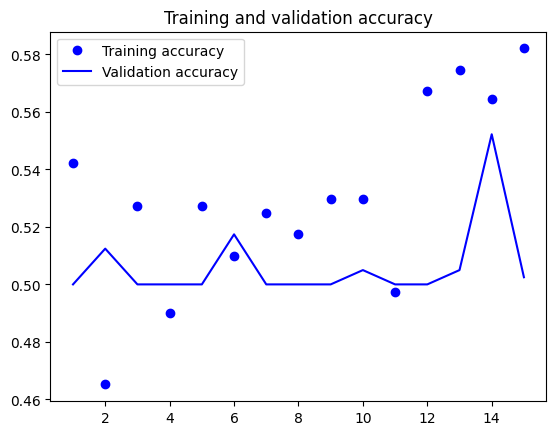

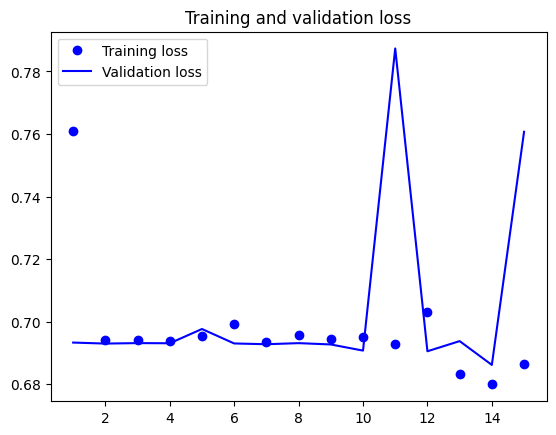

In [24]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

## Listing 8.13
Evaluating the model on the test set . The checkpoints saved the best before overfitting started

In [25]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 383ms/step - accuracy: 0.4900 - loss: 0.6977
Test accuracy: 0.495


## Listing 8.14
Define a data augmentation stage to add to an image model

In [26]:
data_augmentation = keras.Sequential([ layers.RandomFlip("horizontal"),
                                      layers.RandomRotation(0.1),
                                      layers.RandomZoom(0.2),])

## Listing 8.15
Displaying some randomly augmented training images

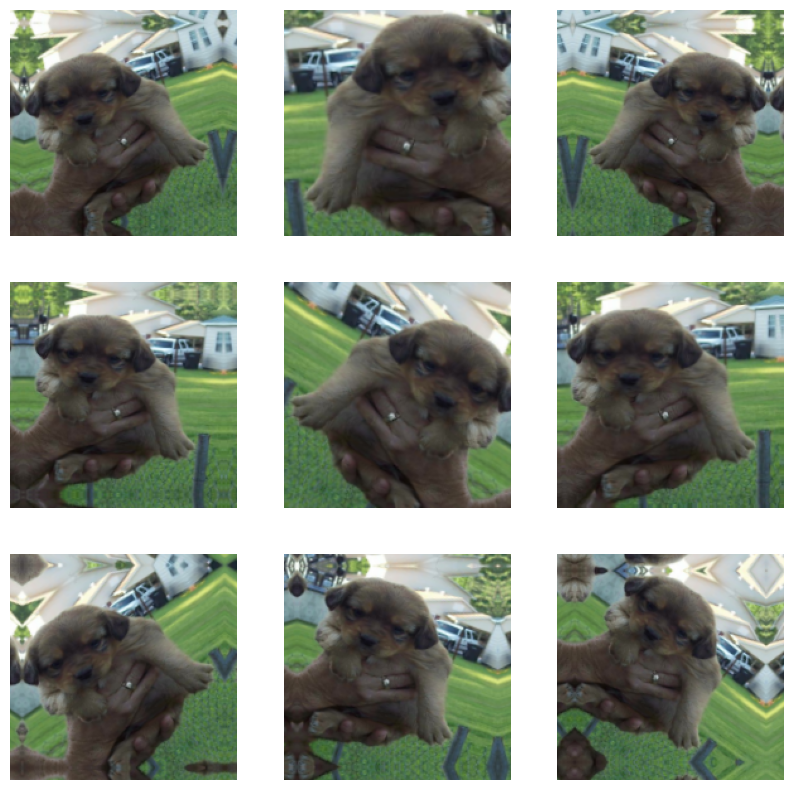

In [27]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(2):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax=plt.subplot(3,3,i+1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

## Listing 8.16
Defining a new convnet that includes image augmentation and dropout

In [28]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
optimizer="rmsprop",
metrics=["accuracy"])

## Listing 8.17
Training the regularized convnet

In [29]:
callbacks = [ keras.callbacks.ModelCheckpoint(
    filepath="convnet_from_scratch_with_augmentation.keras",
    save_best_only=True,
    monitor="val_loss") ]

history = model.fit( train_dataset,
                    epochs=50,
                    validation_data=validation_dataset,
                    callbacks=callbacks)

Epoch 1/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - accuracy: 0.4849 - loss: 0.7828 - val_accuracy: 0.5000 - val_loss: 0.6920
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.5295 - loss: 0.6928 - val_accuracy: 0.5000 - val_loss: 0.7952
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 100s 3s/step - accuracy: 0.4037 - loss: 0.7406 - val_accuracy: 0.5000 - val_loss: 0.6920
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 68s 3s/step - accuracy: 0.5014 - loss: 0.6921 - val_accuracy: 0.6219 - val_loss: 0.6919
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 78s 2s/step - accuracy: 0.5420 - loss: 0.6926 - val_accuracy: 0.5149 - val_loss: 0.6916
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 92s 3s/step - accuracy: 0.5164 - loss: 0.6884 - val_accuracy: 0.5000 - val_loss: 1.2588
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 71s 2s/step - accuracy: 0.5021 - loss: 0.7552 - val_accuracy: 0.5000 - val_loss: 0.6994
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 91s 3s/step - accuracy: 0.5382 - loss: 0.6945 - val_accuracy: 0.5896 - val_loss

KeyboardInterrupt: 

## Visualize again

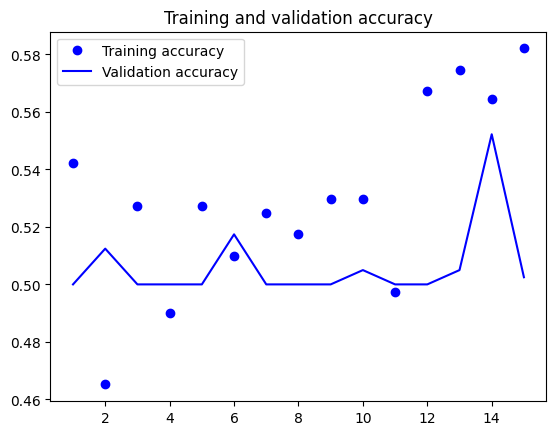

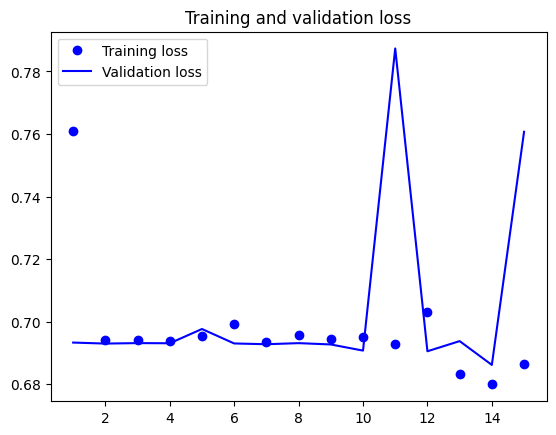

In [30]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

## Listing 8.18
Evaluating the model on the test set

In [31]:
test_model = keras.models.load_model( "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 469ms/step - accuracy: 0.5794 - loss: 0.6499
Test accuracy: 0.579


# Using pre-trained models FC book 8.3
### You can practice this either individually or through a discussion.


## 9.3.5 Putting it together: A mini Xception-like model
This is a resemblance to the Inception model in Juozapas presentation
Using the same Cats_vs_Dogs dataset

As a reminder, here are the convnet architecture principles you’ve learned so far:

    * Your model should be organized into repeated blocks of layers, usually made of multiple convolution layers and a max pooling layer.
    * The number of filters in your layers should increase as the size of the spatial feature maps decreases.
    * Deep and narrow is better than broad and shallow.
    * Introducing residual connections around blocks of layers helps you train deeper networks.
    * It can be beneficial to introduce batch normalization layers after your convolution layers.
    * It can be beneficial to replace Conv2D layers with SeparableConv2D layers, which are more parameter-efficient.

This is implemented in the following.

In [32]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))

# data augmentation is from previous example
data_augmentation = keras.Sequential([ layers.RandomFlip("horizontal"),
                                      layers.RandomRotation(0.1),
                                      layers.RandomZoom(0.2),])

x = data_augmentation(inputs)

x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=5, use_bias=False)(x)

for size in [32, 64, 128, 256, 512]:
    residual = x
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)
    x = layers.SeparableConv2D(size, 3, padding="same", use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)
    x = layers.SeparableConv2D(size, 3, padding="same", use_bias=False)(x)
    x = layers.MaxPooling2D(3, strides=2, padding="same")(x)
    residual = layers.Conv2D(
    size, 1, strides=2, padding="same", use_bias=False)(residual)
    x = layers.add([x, residual])

x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.5)(x)
# https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout
# The Dropout layer randomly sets input units to 0 with a frequency of rate
# at each step during training time,which helps prevent overfitting.
# Inputs not set to 0 are scaled up by 1/(1 - rate) such that the sum over all inputs is unchanged.

# To prune the model is a different approach
# https://www.tensorflow.org/model_optimization/guide/pruning/comprehensive_guide

outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

#### Compile the model

In [33]:
model.compile(loss="binary_crossentropy",
optimizer="rmsprop",
metrics=["accuracy"])

#### Train the model

In [34]:
callbacks = [keras.callbacks.ModelCheckpoint( filepath="xception-like.keras",
                                             save_best_only=True, monitor="val_loss") ]

# save_best_only in ModelCheckpoint saves the last best in the filepath
# The EarlyStopping callback stops the training early, while ModelCheckpoint continues
# https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping

history = model.fit( train_dataset, epochs=30, validation_data=validation_dataset, callbacks=callbacks)

Epoch 1/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 132s 6s/step - accuracy: 0.4666 - loss: 0.8633 - val_accuracy: 0.5000 - val_loss: 0.6988
Epoch 2/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 110s 5s/step - accuracy: 0.5262 - loss: 0.7148 - val_accuracy: 0.5025 - val_loss: 0.6929
Epoch 3/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 140s 5s/step - accuracy: 0.6420 - loss: 0.6535 - val_accuracy: 0.5000 - val_loss: 0.6955
Epoch 4/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 141s 5s/step - accuracy: 0.6527 - loss: 0.6264 - val_accuracy: 0.5000 - val_loss: 0.7359
Epoch 5/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 156s 6s/step - accuracy: 0.5780 - loss: 0.6912 - val_accuracy: 0.5000 - val_loss: 0.7184
Epoch 6/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 108s 5s/step - accuracy: 0.6596 - loss: 0.6446 - val_accuracy: 0.5000 - val_loss: 0.7050
Epoch 7/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 143s 5s/step - accuracy: 0.6226 - loss: 0.6506 - val_accuracy: 0.5000 - val_loss: 0.6991
Epoch 8/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 139s 5s/step - accuracy: 0.6170 - loss: 0.6631 - val_accuracy: 0.5149 - v

#### Visualize again

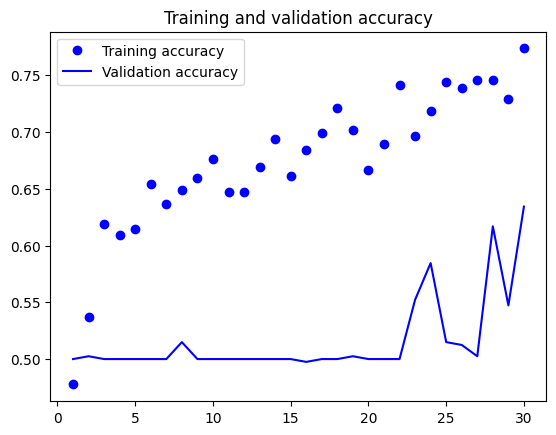

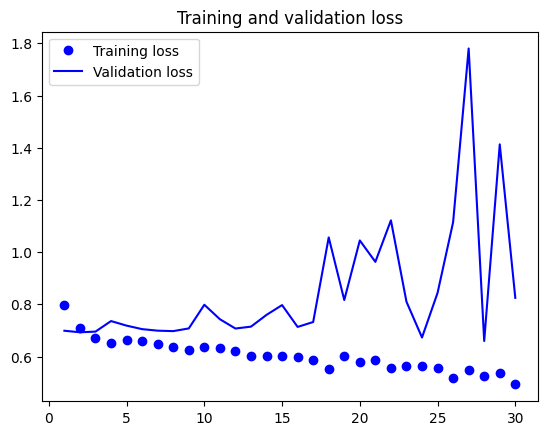

In [35]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

#### Evaluate on the test set

In [36]:
test_model = keras.models.load_model( "xception-like.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

11/11 ━━━━━━━━━━━━━━━━━━━━ 12s 881ms/step - accuracy: 0.5629 - loss: 0.7239
Test accuracy: 0.554


## Continuing with 9.4 Interpreting what Covnets learn

This is very interesting.

#### 1. Visualizing intermediate convnet outputs (intermediate activations)
Useful for understanding how successive convnet layers transform their input, and for getting a
first idea of the meaning of individual convnet filters

#### 2. Visualizing convnet filters
Useful for understanding precisely what visual pattern
or concept each filter in a convnet is receptive to

#### 3. Visualizing heatmaps of class activation in an image
Useful for understanding which parts of an image were identified as belonging to a given class, thus allowing you to localize objects in images


## 9.4.1 Visualizing intermediate activations

In [37]:
from tensorflow import keras
model = keras.models.load_model("convnet_from_scratch_with_augmentation.keras")
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential (Sequential)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_2 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 18, 18, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 9, 9, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 7, 7, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │          12,545 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,982,084 (7.56 MB)

 Trainable params: 991,041 (3.78 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 991,043 (3.78 MB)

## Listing 9.6
Preprocessing a single image

In [38]:
from tensorflow import keras
import numpy as np

# Test image
img_path = keras.utils.get_file( fname="cat.jpg", origin="https://img-datasets.s3.amazonaws.com/cat.jpg")

def get_img_array(img_path, target_size):
    img = keras.utils.load_img( img_path, target_size=target_size)
    array = keras.utils.img_to_array(img)
    array = np.expand_dims(array, axis=0)
    return array

img_tensor = get_img_array(img_path, target_size=(180, 180))


80329/80329 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step


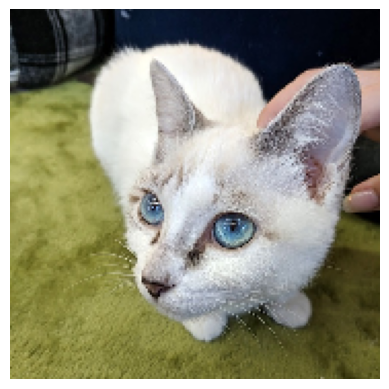

In [39]:
import matplotlib.pyplot as plt

plt.axis("off")
plt.imshow(img_tensor[0].astype("uint8"))
plt.show()

## Listing 9.8
Instantiating a model that returns layer activations

In [40]:
from tensorflow.keras import layers

layer_outputs = []
layer_names = []

for layer in model.layers:
    if isinstance(layer, (layers.Conv2D, layers.MaxPooling2D)):
        layer_outputs.append(layer.output)
        layer_names.append(layer.name)

activation_model = keras.Model(inputs=model.input, outputs=layer_outputs)

## Listing 9.9
Using the model to compute layer activations

In [41]:
activations = activation_model.predict(img_tensor)

first_layer_activation = activations[0]
print(first_layer_activation.shape)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
(1, 178, 178, 32)


## Listing 9.10
Visualizing the fifth channel

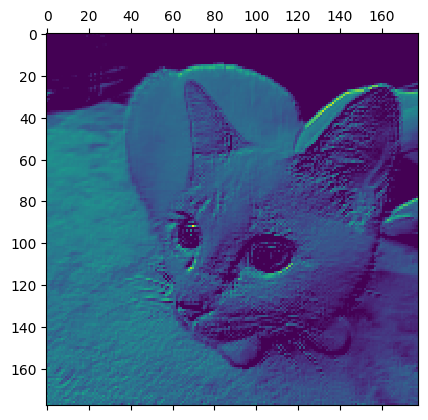

In [42]:
import matplotlib.pyplot as plt

plt.matshow(first_layer_activation[0, :, :, 5], cmap="viridis")

## Listing 9.11
Visualizing every channel in every intermediate activation

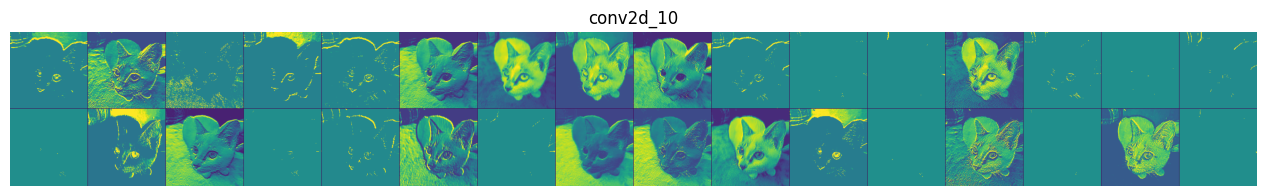

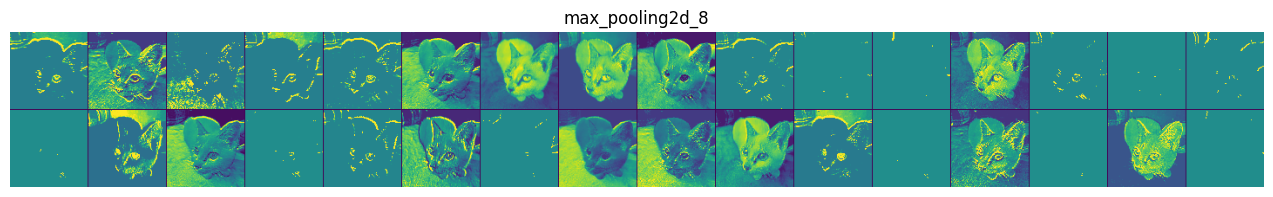

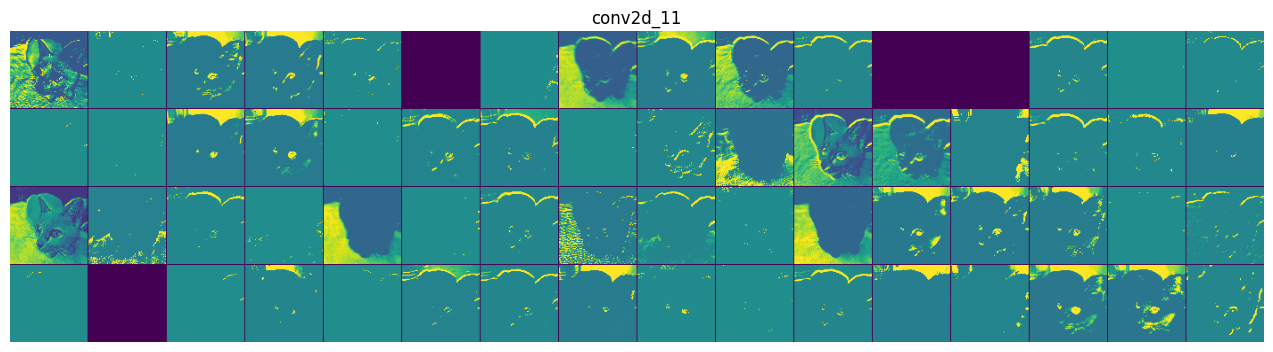

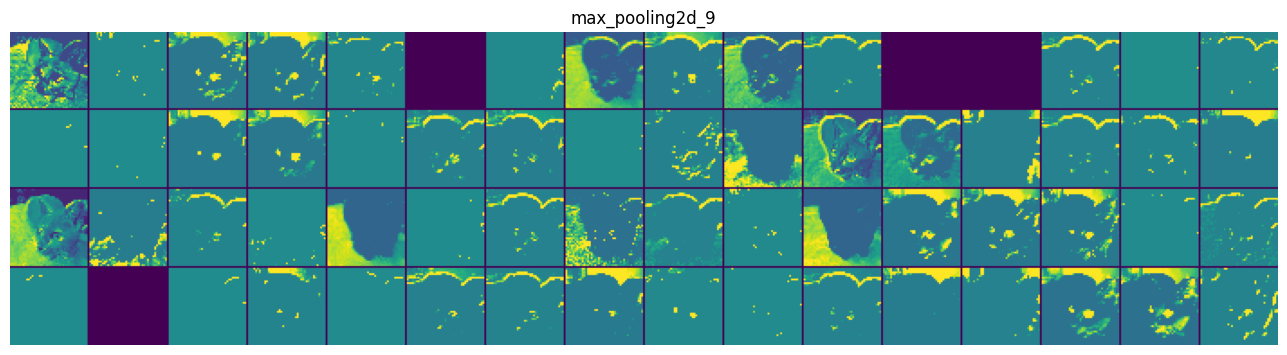

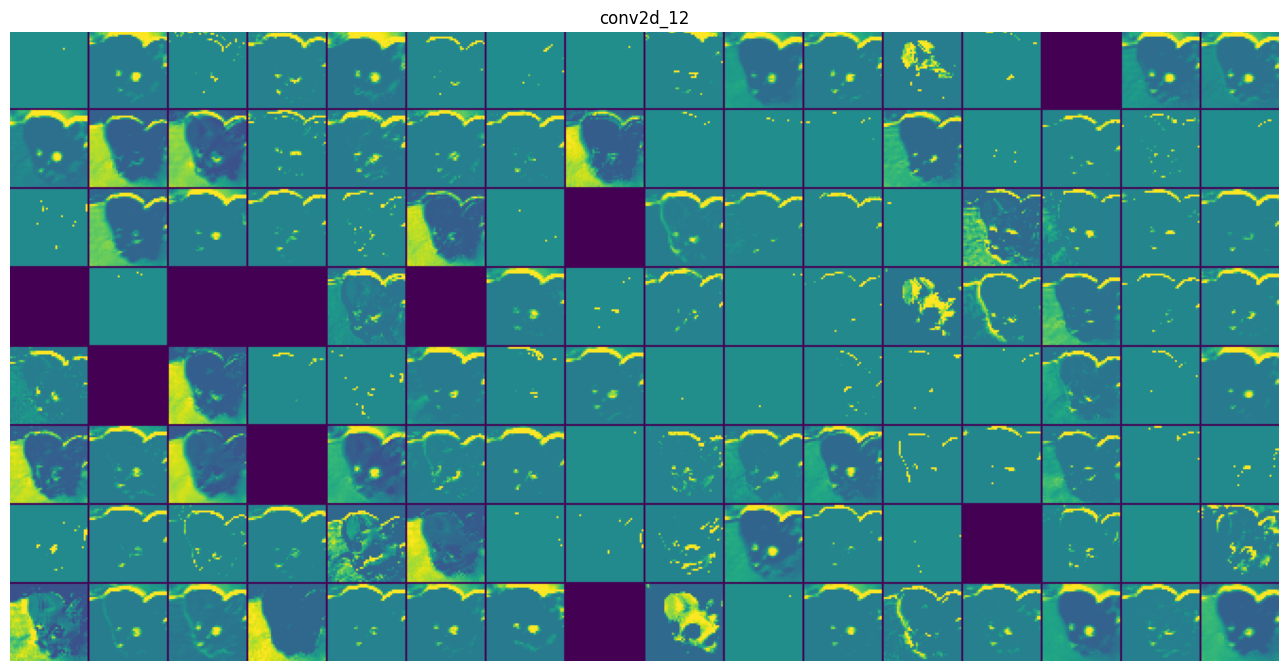

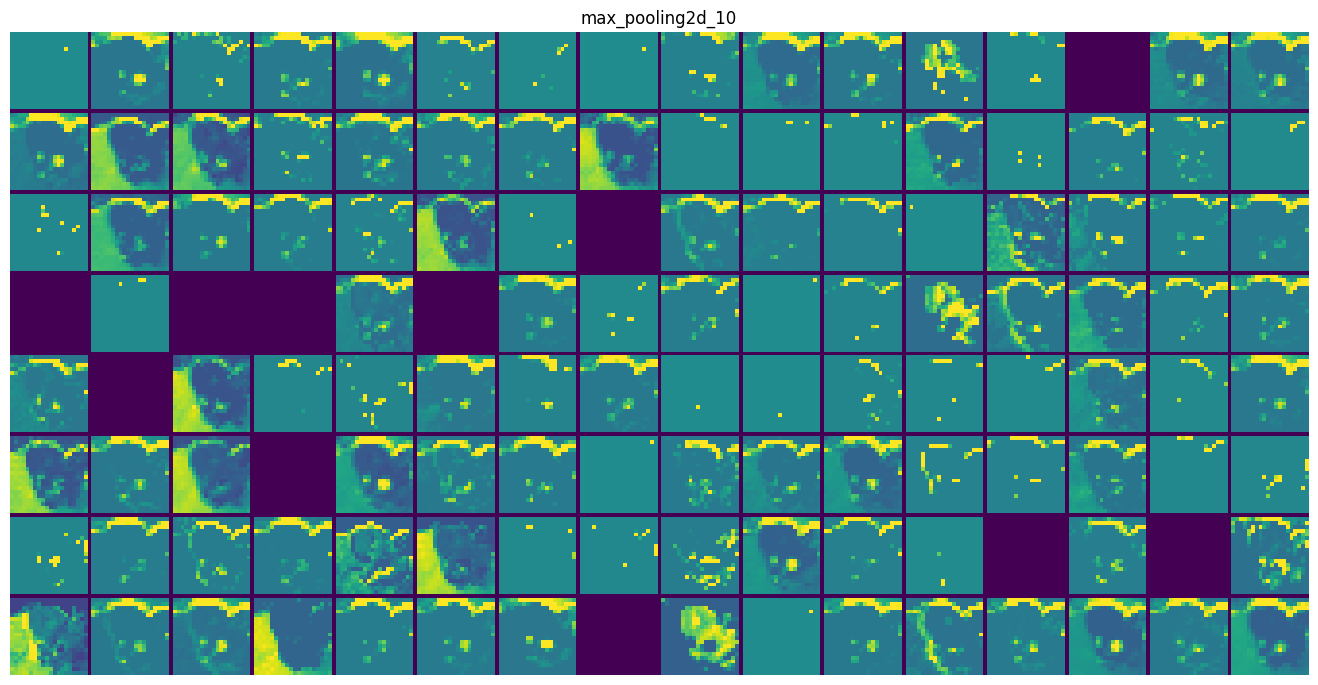

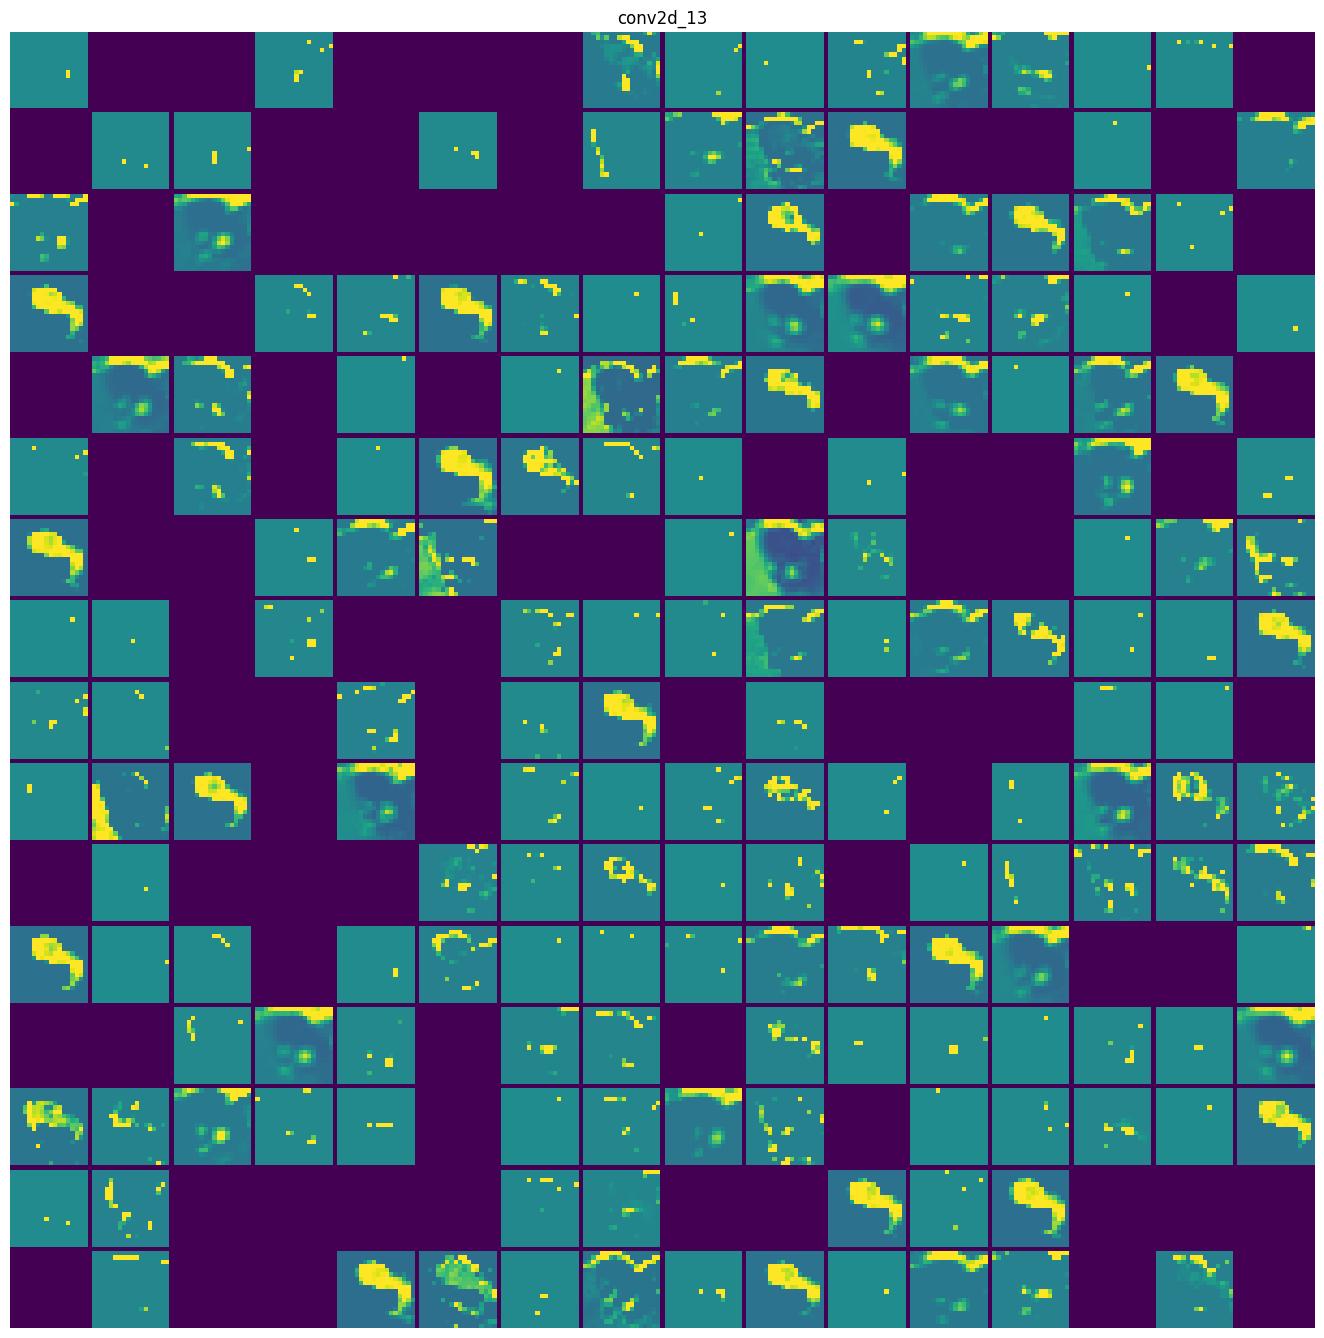

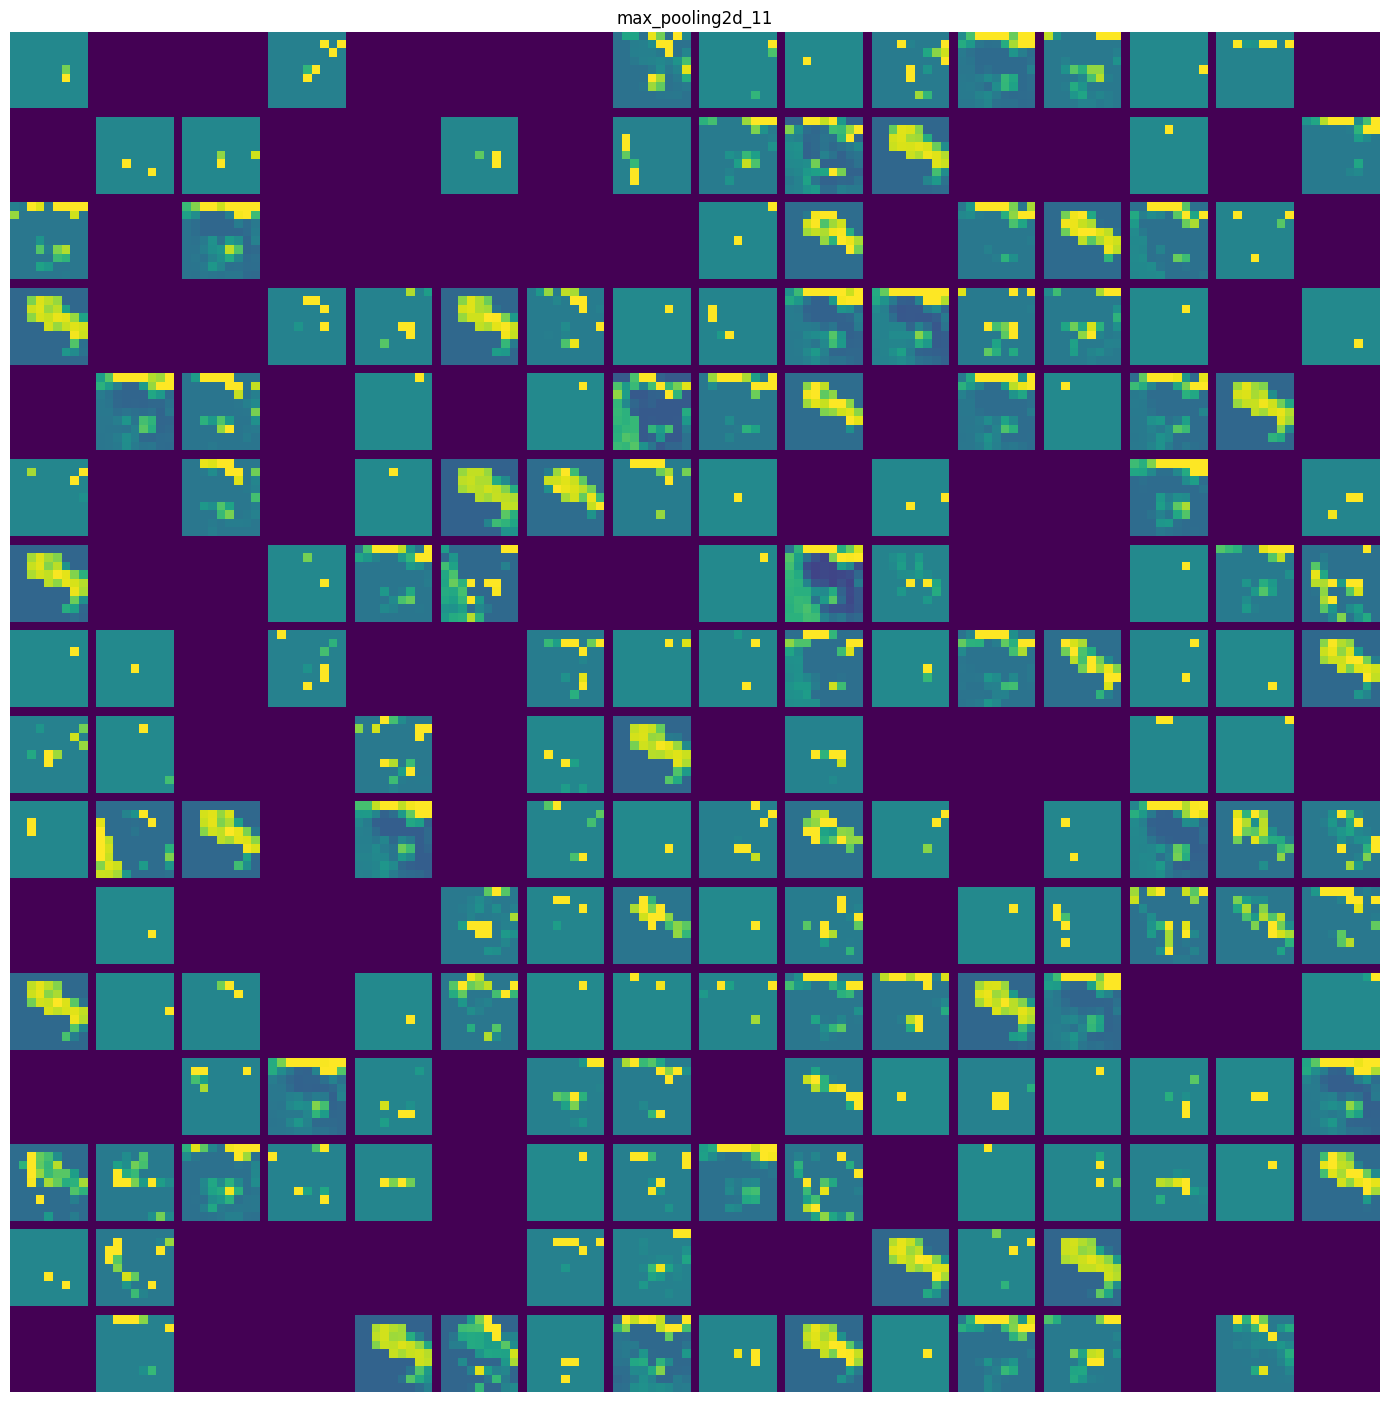

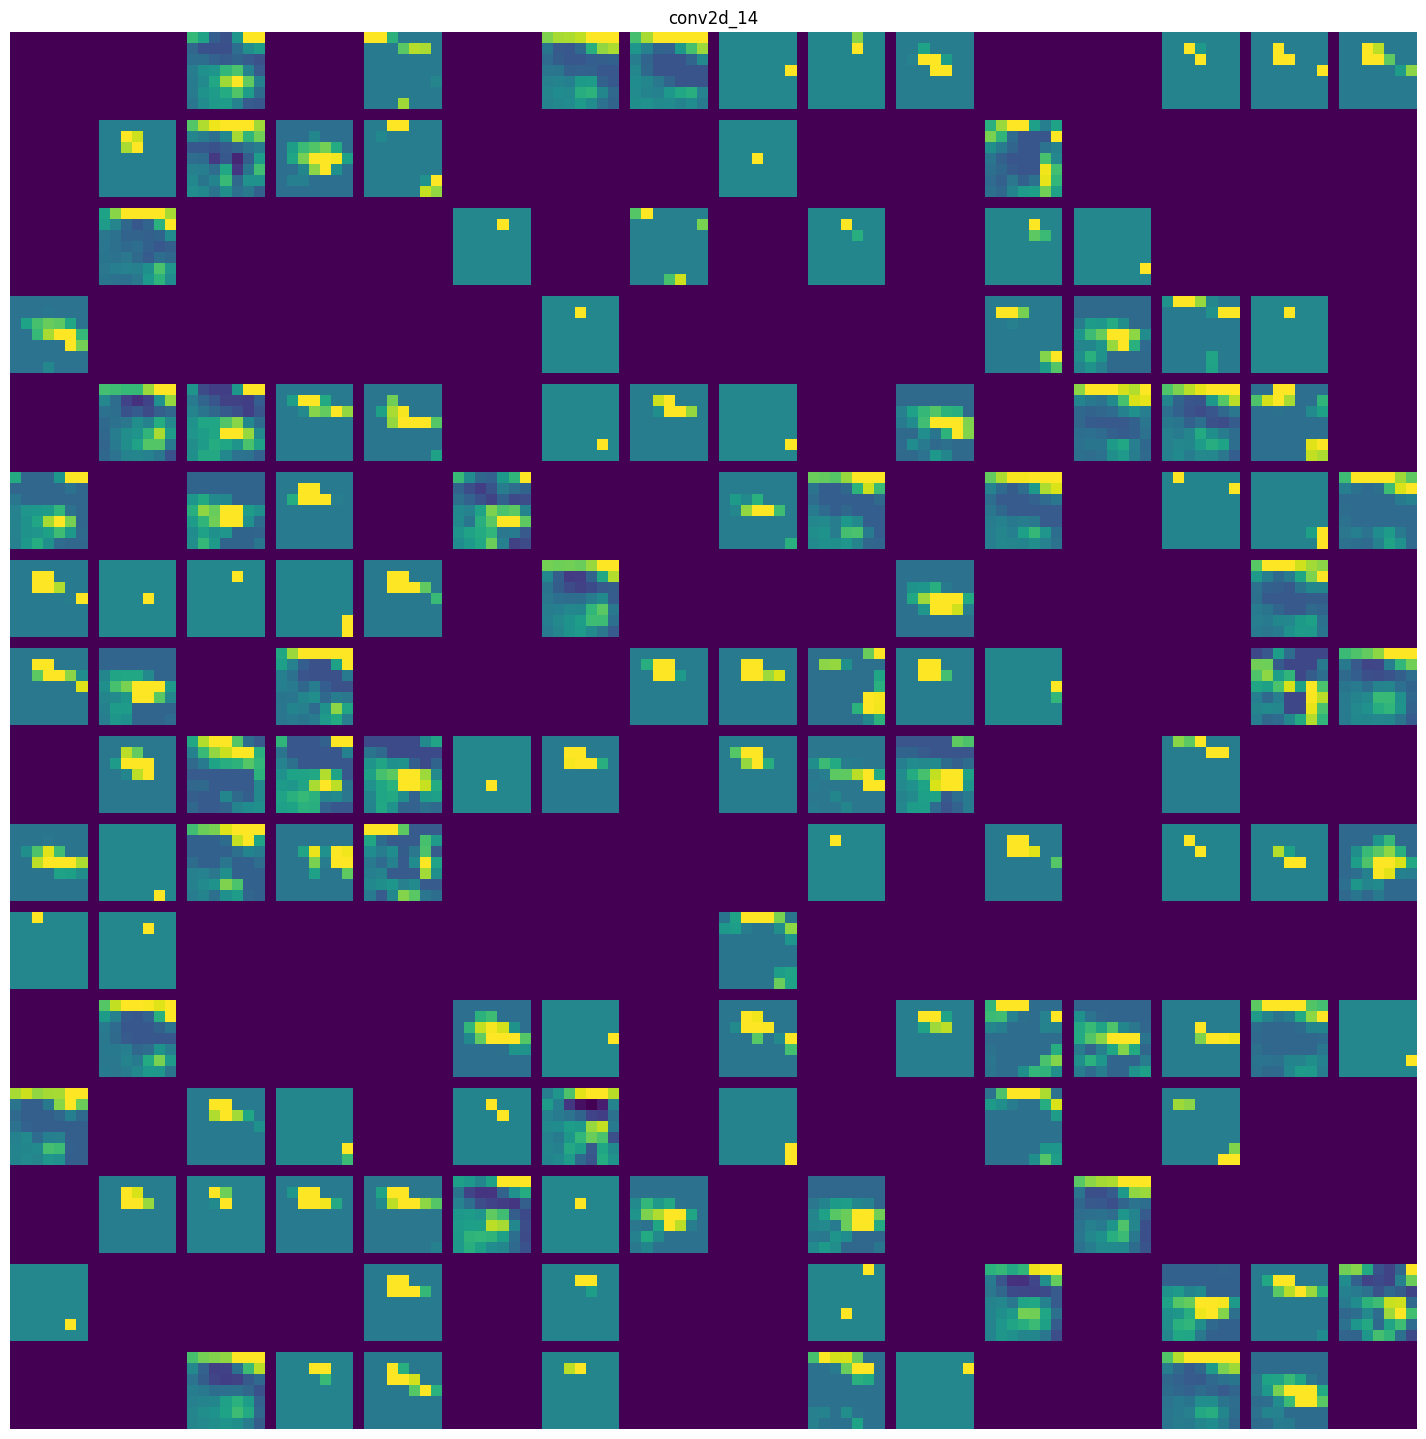

In [43]:
images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]
    n_cols = n_features // images_per_row
    display_grid = np.zeros(((size + 1) * n_cols - 1, images_per_row * (size + 1) - 1))

    for col in range(n_cols):
        for row in range(images_per_row):
            channel_index = col * images_per_row + row
            channel_image = layer_activation[0, :, :, channel_index].copy()
            if channel_image.sum() != 0:
                channel_image -= channel_image.mean()
                channel_image /= channel_image.std()
                channel_image *= 64
                channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype("uint8")
            display_grid[ col * (size + 1): (col + 1) * size + col, row * (size + 1) : (row + 1) * size + row] = channel_image

    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.axis("off")
    plt.imshow(display_grid, aspect="auto", cmap="viridis")

In [44]:
from tensorflow import keras
model = keras.models.load_model("xception-like.keras")
model.summary()

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4             │ (None, 180, 180, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential_1 (Sequential) │ (None, 180, 180, 3)    │              0 │ input_layer_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_3 (Rescaling)   │ (None, 180, 180, 3)    │              0 │ sequential_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_15 (Conv2D)        │ (None, 176, 176, 32)   │          2,400 │ rescaling_3[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 176, 176, 32)   │            128 │ conv2d_15[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 176, 176, 32)   │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ separable_conv2d          │ (None, 176, 176, 32)   │          1,312 │ activation[0][0]       │
│ (SeparableConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 176, 176, 32)   │            128 │ separable_conv2d[0][0] │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 176, 176, 32)   │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ separable_conv2d_1        │ (None, 176, 176, 32)   │          1,312 │ activation_1[0][0]     │
│ (SeparableConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_12          │ (None, 88, 88, 32)     │              0 │ separable_conv2d_1[0]… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_16 (Conv2D)        │ (None, 88, 88, 32)     │          1,024 │ conv2d_15[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 88, 88, 32)     │              0 │ max_pooling2d_12[0][0… │
│                           │                        │                │ conv2d_16[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 88, 88, 32)     │            128 │ add[0][0]              │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 88, 88, 32)     │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ separable_conv2d_2   

 Total params: 1,440,708 (5.50 MB)

 Trainable params: 718,849 (2.74 MB)

 Non-trainable params: 3,008 (11.75 KB)

 Optimizer params: 718,851 (2.74 MB)

## 9.4.2 Visualizing convnet filters

## Listing 9.12
Instantiating the Xception convolutional base

In [45]:
model = keras.applications.xception.Xception( weights="imagenet", include_top=False)

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## Listing 9.13
Printing the names of all convolutional layers in Xception

In [46]:
for layer in model.layers:
    if isinstance(layer, (keras.layers.Conv2D, keras.layers.SeparableConv2D)):
        print(layer.name)

block1_conv1
block1_conv2
block2_sepconv1
block2_sepconv2
conv2d_21
block3_sepconv1
block3_sepconv2
conv2d_22
block4_sepconv1
block4_sepconv2
conv2d_23
block5_sepconv1
block5_sepconv2
block5_sepconv3
block6_sepconv1
block6_sepconv2
block6_sepconv3
block7_sepconv1
block7_sepconv2
block7_sepconv3
block8_sepconv1
block8_sepconv2
block8_sepconv3
block9_sepconv1
block9_sepconv2
block9_sepconv3
block10_sepconv1
block10_sepconv2
block10_sepconv3
block11_sepconv1
block11_sepconv2
block11_sepconv3
block12_sepconv1
block12_sepconv2
block12_sepconv3
block13_sepconv1
block13_sepconv2
conv2d_24
block14_sepconv1
block14_sepconv2


## Listing 9.14
Creating a feature extractor model

In [47]:
layer_name = "block3_sepconv1"
layer = model.get_layer(name=layer_name)
feature_extractor = keras.Model(inputs=model.input, outputs=layer.output)

## Listing 9.15
Using the feature extractor

To use this model, simply call it on some input data (note that Xception requires
inputs to be preprocessed via the keras.applications.xception.preprocess_input
function).

In [ ]:
activation = feature_extractor( keras.applications.xception.preprocess_input(img_tensor) )

In [48]:
import tensorflow as tf

def compute_loss(image, filter_index):
    activation = feature_extractor(image)
    filter_activation = activation[:, 2:-2, 2:-2, filter_index]
    return tf.reduce_mean(filter_activation)

## Listing 9.16
Loss maximization via stochastic gradient ascent

In [50]:
@tf.function

def gradient_ascent_step(image, filter_index, learning_rate):
    with tf.GradientTape() as tape:
        tape.watch(image)
        loss = compute_loss(image, filter_index)
    grads = tape.gradient(loss, image)
    grads = tf.math.l2_normalize(grads)
    image += learning_rate * grads
    return image

## Listing 9.17
Function to generate filter visualizations

In [51]:
img_width = 200
img_height = 200

def generate_filter_pattern(filter_index):
    iterations = 30
    learning_rate = 10.
    image = tf.random.uniform( minval=0.4, maxval=0.6, shape=(1, img_width, img_height, 3))
    for i in range(iterations):
        image = gradient_ascent_step(image, filter_index, learning_rate)
    return image[0].numpy()

## Listing 9.18
Utility function to convert a tensor into a valid image

In [52]:
def deprocess_image(image):
    image -= image.mean()
    image /= image.std()
    image *= 64
    image += 128
    image = np.clip(image, 0, 255).astype("uint8")
    image = image[25:-25, 25:-25, :]
    return image

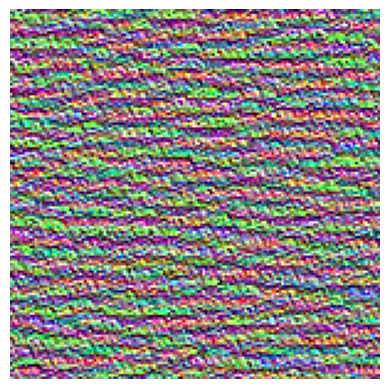

In [53]:
plt.axis("off")
plt.imshow(deprocess_image(generate_filter_pattern(filter_index=2)))

## Listing 9.19
Generating a grid of all filter response patterns in a layer

In [55]:
"""
all_images = []
for filter_index in range(64):
    print(f"Processing filter {filter_index}")
    image = deprocess_image(generate_filter_pattern(filter_index) )
    all_images.append(image)

margin = 5
n = 8
cropped_width = img_width - 25 * 2
cropped_height = img_height - 25 * 2
width = n * cropped_width + (n - 1) * margin
height = n * cropped_height + (n - 1) * margin
stitched_filters = np.zeros((width, height, 3))

for i in range(n):
    for j in range(n):
        image = all_images[i * n + j]
        row_start = (cropped_width + margin) * i
        row_end = (cropped_width + margin) * i + cropped_width
        column_start = (cropped_height + margin) * j
        column_end = (cropped_height + margin) * j + cropped_height
        stitched_filters[ row_start: row_end,column_start: column_end, :] = image

keras.utils.save_img(f"filters_for_layer_{layer_name}.png", stitched_filters)
"""

'\nall_images = []\nfor filter_index in range(64):\n    print(f"Processing filter {filter_index}")\n    image = deprocess_image(generate_filter_pattern(filter_index) )\n    all_images.append(image)\n\nmargin = 5\nn = 8\ncropped_width = img_width - 25 * 2\ncropped_height = img_height - 25 * 2\nwidth = n * cropped_width + (n - 1) * margin\nheight = n * cropped_height + (n - 1) * margin\nstitched_filters = np.zeros((width, height, 3))\n\nfor i in range(n):\n    for j in range(n):\n        image = all_images[i * n + j]\n        row_start = (cropped_width + margin) * i\n        row_end = (cropped_width + margin) * i + cropped_width\n        column_start = (cropped_height + margin) * j\n        column_end = (cropped_height + margin) * j + cropped_height\n        stitched_filters[ row_start: row_end,column_start: column_end, :] = image\n\nkeras.utils.save_img(f"filters_for_layer_{layer_name}.png", stitched_filters)\n'

## 9.4.3
Visualizing heatmaps of class activation

Complete if you have time.